# Pregunta 2: Análisis de sentimientos usando RNN

In [1]:
import numpy as np
from theano.tensor.shared_randomstreams import RandomStreams
from matplotlib import pyplot
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.layers import Dropout
from keras.models import load_model

Using Theano backend.


a) Cargar el dataset completo

In [2]:
from keras.datasets import imdb
np.random.seed(3)
srng = RandomStreams(8)
(X_train, y_train), (X_test, y_test) = imdb.load_data(seed=15)

b) Cantidad de palabras en el dataset, boxplot de distribución de largo de palabras

Palabras en el dataset:  50000


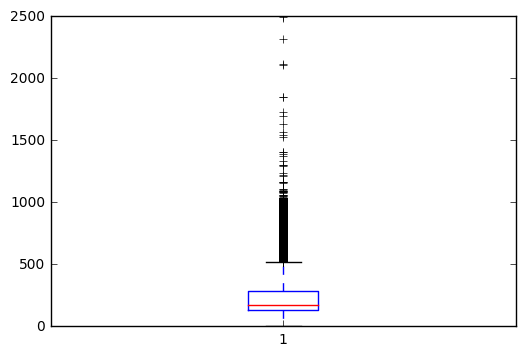

In [3]:
# Concatenamiento de conjuntos de entrenamiento
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

print "Palabras en el dataset: ", X.size
result = map(len, X)
pyplot.boxplot(result)
pyplot.show()

c) Cargar palabras más relevantes y acotar largo de comentarios

In [4]:
# Se cargan las 3000 palabras más relevantes
top_words = 3000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words, seed=15)

# Se acotan los comentarios a un máximo de 500 palabras
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

d) Entrenamiento red LSTM con capa de embedding

In [5]:
# Tamaño vector generado por embedding
embedding_vector_length = 32

model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_1 (Embedding)          (None, 500, 32)       96000       embedding_input_1[0][0]          
____________________________________________________________________________________________________
lstm_1 (LSTM)                    (None, 100)           53200       embedding_1[0][0]                
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 1)             101         lstm_1[0][0]                     
Total params: 149301
____________________________________________________________________________________________________


```python
# Se entrena el modelo en servidor GPU y se guarda para luego ser evaluado
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
model.save('Pregunta2/LSTM-32.h5')
```

In [6]:
model = load_model('Pregunta2/LSTM-32.h5')
scores = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: ', scores[1])

('Accuracy: ', 0.86072000000000004)


e) Entrenamiento red LSTM con distintos tamaños de vector de embedding, se prueba con valores 16 y 64 además del 32 de la pregunta anterior

In [7]:
# Tamaño vector generado por embedding largo 16
embedding_vector_length = 16

model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_2 (Embedding)          (None, 500, 16)       48000       embedding_input_3[0][0]          
____________________________________________________________________________________________________
lstm_2 (LSTM)                    (None, 100)           46800       embedding_2[0][0]                
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 1)             101         lstm_2[0][0]                     
Total params: 94901
____________________________________________________________________________________________________


```python
# Se entrena el modelo en servidor GPU y se guarda para luego ser evaluado
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
model.save('pregunta2/LSTM-16.h5')
```

In [8]:
# Tamaño vector generado por embedding largo 64
embedding_vector_length = 64

model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_3 (Embedding)          (None, 500, 64)       192000      embedding_input_4[0][0]          
____________________________________________________________________________________________________
lstm_3 (LSTM)                    (None, 100)           66000       embedding_3[0][0]                
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 1)             101         lstm_3[0][0]                     
Total params: 258101
____________________________________________________________________________________________________


```python
# Se entrena el modelo en servidor GPU y se guarda para luego ser evaluado
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
model.save('pregunta2/LSTM-64.h5')
```

In [9]:
# Se cargan los modelos obtenidos
model16 = load_model('Pregunta2/LSTM-16.h5')
model32 = load_model('Pregunta2/LSTM-32.h5')
model64 = load_model('Pregunta2/LSTM-64.h5')

# Se obtiene el accuracy de cada modelo
scores16 = model16.evaluate(X_test, y_test, verbose=0)
scores32 = model32.evaluate(X_test, y_test, verbose=0)
scores64 = model64.evaluate(X_test, y_test, verbose=0)

print('Accuracy tamaño de vector 16: ', scores16[1])
print('Accuracy tamaño de vector 32: ', scores32[1])
print('Accuracy tamaño de vector 64: ', scores64[1])

print('Pérdida tamaño de vector 16: ', scores16[0])
print('Pérdida tamaño de vector 32: ', scores32[0])
print('Pérdida tamaño de vector 64: ', scores64[0])

('Accuracy tama\xc3\xb1o de vector 16: ', 0.84792000000000001)
('Accuracy tama\xc3\xb1o de vector 32: ', 0.86072000000000004)
('Accuracy tama\xc3\xb1o de vector 64: ', 0.86680000000000001)
('P\xc3\xa9rdida tama\xc3\xb1o de vector 16: ', 0.35966520366907118)
('P\xc3\xa9rdida tama\xc3\xb1o de vector 32: ', 0.33023624739646912)
('P\xc3\xa9rdida tama\xc3\xb1o de vector 64: ', 0.32640593312382699)


f) Entrenamiento cambiando el tamaño de las palabras seleccionadas

Se probará con 3000, 5000 y 8000 palabras top

In [10]:
# Se cargan las 3000 palabras más relevantes
top_words = 3000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words, seed=15)

# Se acotan los comentarios a un máximo de 500 palabras
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

# Tamaño vector generado por embedding largo 32
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_4 (Embedding)          (None, 500, 32)       96000       embedding_input_8[0][0]          
____________________________________________________________________________________________________
lstm_4 (LSTM)                    (None, 100)           53200       embedding_4[0][0]                
____________________________________________________________________________________________________
dense_4 (Dense)                  (None, 1)             101         lstm_4[0][0]                     
Total params: 149301
____________________________________________________________________________________________________


```python
# Se entrena el modelo en servidor GPU y se guarda para luego ser evaluado
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
model.save('pregunta2/LSTM-words-3000.h5')
```

In [11]:
# Se cargan las 5000 palabras más relevantes
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words, seed=15)

# Se acotan los comentarios a un máximo de 500 palabras
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

# Tamaño vector generado por embedding largo 32
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_5 (Embedding)          (None, 500, 32)       160000      embedding_input_9[0][0]          
____________________________________________________________________________________________________
lstm_5 (LSTM)                    (None, 100)           53200       embedding_5[0][0]                
____________________________________________________________________________________________________
dense_5 (Dense)                  (None, 1)             101         lstm_5[0][0]                     
Total params: 213301
____________________________________________________________________________________________________


```python
# Se entrena el modelo en servidor GPU y se guarda para luego ser evaluado
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
model.save('pregunta2/LSTM-words-5000.h5')
```

In [12]:
# Se cargan las 8000 palabras más relevantes
top_words = 8000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words, seed=15)

# Se acotan los comentarios a un máximo de 500 palabras
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

# Tamaño vector generado por embedding largo 32
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_6 (Embedding)          (None, 500, 32)       256000      embedding_input_10[0][0]         
____________________________________________________________________________________________________
lstm_6 (LSTM)                    (None, 100)           53200       embedding_6[0][0]                
____________________________________________________________________________________________________
dense_6 (Dense)                  (None, 1)             101         lstm_6[0][0]                     
Total params: 309301
____________________________________________________________________________________________________


```python

# Se entrena el modelo en servidor GPU y se guarda para luego ser evaluado
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
model.save('pregunta2/LSTM-words-8000.h5')
```

In [15]:
# Se cargan los modelos opbtenidos
model_3000 = load_model('Pregunta2/LSTM-words-3000.h5')
model_5000 = load_model('Pregunta2/LSTM-words-5000.h5')
model_8000 = load_model('Pregunta2/LSTM-words-8000.h5')

# Se obtiene el accuracy de cada modelo

# Se cargan las 8000 palabras más relevantes
top_words = 3000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words, seed=15)
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)
scores3000 = model_3000.evaluate(X_test, y_test, verbose=0)

top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words, seed=15)
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)
scores5000 = model_5000.evaluate(X_test, y_test, verbose=0)

top_words = 8000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words, seed=15)
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)
scores8000 = model_8000.evaluate(X_test, y_test, verbose=0)

print('Accuracy cantidad de palabras 3000: ', scores3000[1])
print('Accuracy cantidad de palabras 5000: ', scores5000[1])
print('Accuracy cantidad de palabras 8000: ', scores8000[1])

print('Perdida cantidad de palabras 3000: ', scores3000[0])
print('Perdida cantidad de palabras 5000: ', scores5000[0])
print('Perdida cantidad de palabras 8000: ', scores8000[0])

('Accuracy cantidad de palabras 3000: ', 0.86199999999999999)
('Accuracy cantidad de palabras 5000: ', 0.87231999999999998)
('Accuracy cantidad de palabras 8000: ', 0.86387999999999998)
('Perdida cantidad de palabras 3000: ', 0.32267902331829074)
('Perdida cantidad de palabras 5000: ', 0.30801745999336244)
('Perdida cantidad de palabras 8000: ', 0.31699821529388428)


g) Usar Dropout para entrenar

In [16]:
embedding_vector_length = 32
top_words = 5000
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=500))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_7 (Embedding)          (None, 500, 32)       160000      embedding_input_17[0][0]         
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 500, 32)       0           embedding_7[0][0]                
____________________________________________________________________________________________________
lstm_7 (LSTM)                    (None, 100)           53200       dropout_1[0][0]                  
____________________________________________________________________________________________________
dropout_2 (Dropout)              (None, 100)           0           lstm_7[0][0]                     
___________________________________________________________________________________________

```python
model.fit(X_train, y_train, nb_epoch=3, batch_size=64)
model.save('pregunta2/LSTM-dropout.h5')
```

In [19]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words, seed=15)
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

model = load_model('Pregunta2/LSTM-dropout.h5')
scores = model.evaluate(X_test, y_test, verbose=0)

print('Accuracy: ', scores[1])
print('Pérdida: ', scores[0])

('Accuracy: ', 0.86987999999999999)
('P\xc3\xa9rdida: ', 0.31332884783506393)


h) Propuesta nuevo modelo

In [4]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words, seed=15)
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)
embedding_vector_length = 64
top_words = 5000
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=500))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_1 (Embedding)          (None, 500, 64)       320000      embedding_input_2[0][0]          
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 500, 64)       0           embedding_1[0][0]                
____________________________________________________________________________________________________
lstm_1 (LSTM)                    (None, 100)           66000       dropout_1[0][0]                  
____________________________________________________________________________________________________
dropout_2 (Dropout)              (None, 100)           0           lstm_1[0][0]                     
___________________________________________________________________________________________

```python
model.fit(X_train, y_train, nb_epoch=3, batch_size=64)
model.save('pregunta2/LSTM-dropout-64.h5')
```

In [5]:
model = load_model('Pregunta2/LSTM-dropout-64.h5')
scores = model.evaluate(X_test, y_test, verbose=0)

print('Accuracy: ', scores[1])
print('Pérdida: ', scores[0])

('Accuracy: ', 0.85399999999999998)
('P\xc3\xa9rdida: ', 0.35145377113342285)


In [6]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words, seed=15)
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)
embedding_vector_length = 64
top_words = 5000
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=500))
model.add(Dropout(0.1))
model.add(LSTM(100))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_2 (Embedding)          (None, 500, 64)       320000      embedding_input_4[0][0]          
____________________________________________________________________________________________________
dropout_3 (Dropout)              (None, 500, 64)       0           embedding_2[0][0]                
____________________________________________________________________________________________________
lstm_2 (LSTM)                    (None, 100)           66000       dropout_3[0][0]                  
____________________________________________________________________________________________________
dropout_4 (Dropout)              (None, 100)           0           lstm_2[0][0]                     
___________________________________________________________________________________________

```python
model.fit(X_train, y_train, nb_epoch=3, batch_size=64)
model.save('pregunta2/LSTM-dropout-64.h5')
```

In [8]:
model = load_model('Pregunta2/LSTM-dropout-64-2.h5')
scores = model.evaluate(X_test, y_test, verbose=0)

print('Accuracy: ', scores[1])
print('Perdida: ', scores[0])

('Accuracy: ', 0.86287999999999998)
('Perdida: ', 0.32029778882503507)


In [3]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words, seed=15)
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)
embedding_vector_length = 32
top_words = 5000
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=500))
model.add(Dropout(0.1))
model.add(LSTM(100))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_1 (Embedding)          (None, 500, 32)       160000      embedding_input_1[0][0]          
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 500, 32)       0           embedding_1[0][0]                
____________________________________________________________________________________________________
lstm_1 (LSTM)                    (None, 100)           53200       dropout_1[0][0]                  
____________________________________________________________________________________________________
dropout_2 (Dropout)              (None, 100)           0           lstm_1[0][0]                     
___________________________________________________________________________________________

```python
model.fit(X_train, y_train, nb_epoch=3, batch_size=64)
model.save('pregunta2/LSTM-dropout-64-3.h5')
```

In [4]:
model = load_model('Pregunta2/LSTM-dropout-64-3.h5')
scores = model.evaluate(X_test, y_test, verbose=0)

print('Accuracy: ', scores[1])
print('Perdida: ', scores[0])

('Accuracy: ', 0.87439999999999996)
('Perdida: ', 0.32589475166678428)
